In [ ]:
import os
import openai
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Retrieve environment variables
api_key = os.getenv("AZURE_OPENAI_API_KEY")
endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
api_version = os.getenv("AZURE_OPENAI_API_VERSION")
deployment_name = os.getenv("AZURE_OPENAI_CHAT_MODEL")

# Set up the OpenAI API client
openai.api_type = "azure"
openai.api_base = endpoint
openai.api_version = api_version
openai.api_key = api_key

# Define the model and parameters
model_name = deployment_name
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Hello, how are you?"},
    {"role": "assistant", "content": "Hi, I'm doing well. How can I assist you today?"}
]

# Invoke the Azure OpenAI API
response = openai.ChatCompletion.create(
    engine=model_name,
    messages=messages,
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

# Print the AI message content
print(response['choices'][0]['message']['content'])

In [1]:
import os
from dotenv import load_dotenv
from langchain_openai import AzureChatOpenAI

load_dotenv()

model_name = "gpt-4o"
api_key = os.getenv("OPENAI_API_KEY")
endpoint = os.getenv("ENDPOINT")
api_version = os.getenv("OPENAI_API_VERSION")

llm = AzureChatOpenAI(
    azure_deployment=model_name,  # or your deployment
    api_version=api_version,
    azure_endpoint= endpoint,    # or your api version
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

ai_msg = llm.invoke("messages")

print(ai_msg.content)

AttributeError: module 'openai' has no attribute 'AzureOpenAI'

## Chatbots With Langgraph

In [2]:
# !pip install langgraph langsmith
# !pip install langchain langchain_groq langchain_community
# !pip install langchain_groq
# !pip install groq
# !python -m pip install pip-system-certs --use-feature=truststore
# !pip install azure-ai-openai
# !pip install langchain_openai
# !pip install openai --upgrade
# !pip install fitz
# !pip install PyMuPDF

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()

# Load environment variables from.env
model_name = "gpt-4o"
api_key = os.getenv("OPENAI_API_KEY")
endpoint = os.getenv("ENDPOINT")
api_version = os.getenv("OPENAI_API_VERSION")
langsmith = os.getenv('LANGSMITH_API_KEY')

In [4]:
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = "SOCR-Test"

## Start Building Chatbot Using Langgraph

In [5]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [6]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [7]:
graph_builder

In [9]:
from langchain_openai import AzureChatOpenAI

# Initialize the AzureChatOpenAI model
llm = AzureChatOpenAI(
    azure_deployment=model_name,  # or your deployment
    api_version=api_version,
    azure_endpoint=endpoint,  # or your api version
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

# Get user input for the sentence to be translated
user_input = input("Please enter a sentence in English to translate to French: ")

# Prepare the messages for the model
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", user_input),  # Use the user input here
]

# Invoke the model with the messages
ai_msg = llm.invoke(messages)

# Print the translated message
print(ai_msg.content)

AuthenticationError: Error code: 401 - {'statusCode': 401, 'message': 'Unauthorized. Access token is missing, invalid, audience is incorrect (https://cognitiveservices.azure.com), or have expired.'}

In [60]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [63]:
graph_builder.add_node("chatbot",chatbot)

In [65]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [67]:
graph=graph_builder.compile()

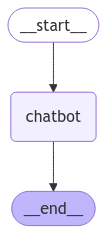

In [68]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"])

dict_values([{'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='aaa84006-1128-4730-8c60-d2261e997bf7'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 7, 'total_tokens': 16, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_04751d0b65', 'finish_reason': 'stop', 'logprobs': None}, id='run-5189545e-a752-459c-8ecd-015c9188e07a-0')]}])
[HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='aaa84006-1128-4730-8c60-d2261e997bf7'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 7, 'total_tokens': 16, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_04751d0b65', 'finish_reaso

: 